In [1]:
import os

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
data_path = '../data_src'

df = pd.read_csv(os.path.join(data_path, 'activity_data.csv'))
df_act_hr = pd.read_csv(os.path.join(data_path, 'activity_data_heartrate.csv'))
df_hr = pd.read_csv(os.path.join(data_path, 'heartrate.csv'))
df_sleep = pd.read_csv(os.path.join(data_path, 'sleep_data.csv'))

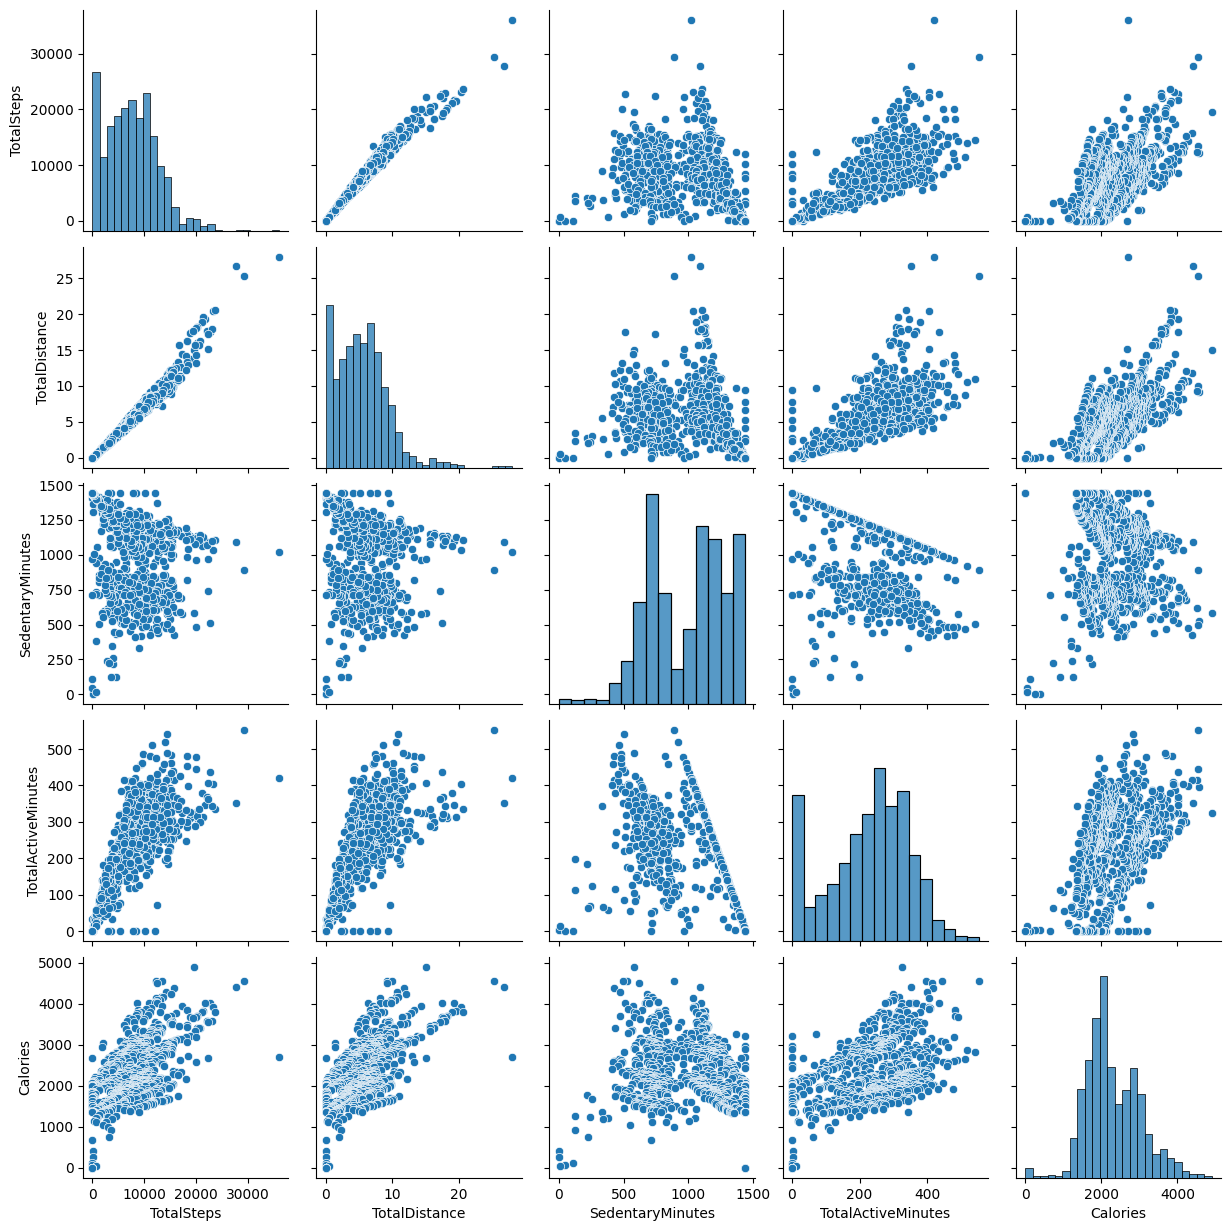

In [50]:
sns.pairplot(df.iloc[:, 2:])

In [45]:
df.isna().sum()

Id                    0
Date                  0
TotalSteps            0
TotalDistance         0
SedentaryMinutes      0
TotalActiveMinutes    0
Calories              0
dtype: int64

<Axes: >

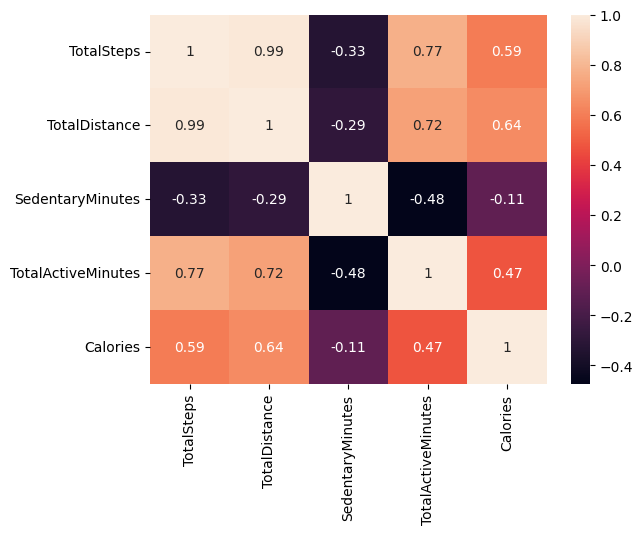

In [63]:
sns.heatmap(df.iloc[:, 2:].corr(), annot=True)

Let's consider 2 features for predicting `Calories`: `TotalDistance` and `TotalActiveMinutes`.

In [190]:
df_new = df[['TotalDistance', 'TotalActiveMinutes', 'Calories']]

In [191]:
df_new = df_new[~(df_new['Calories']==0)]

Let's Impute

In [192]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler

In [193]:
df_train = df_new[df_new['TotalDistance']>0]
df_test = df_new[df_new['TotalDistance']==0]

target_feat = ['TotalDistance']
train_feats = ['Calories']

scaler = MinMaxScaler()
df_train_scaled = scaler.fit_transform(df_train[train_feats])
df_test_scaled = scaler.transform(df_test[train_feats])

model = Ridge()

model.fit(X=df_train_scaled, y=df_train[target_feat])

preds = model.predict(df_test_scaled)

df_test['TotalDistance'] = preds

df_new = pd.concat([df_train, df_test], axis=0)

C:\Users\yogaw\AppData\Local\Temp\ipykernel_14448\2826486792.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['TotalDistance'] = preds


In [195]:
df_train = df_new[df_new['TotalActiveMinutes']>0]
df_test = df_new[df_new['TotalActiveMinutes']==0]

target_feat = ['TotalActiveMinutes']
train_feats = ['Calories']

scaler = MinMaxScaler()
df_train_scaled = scaler.fit_transform(df_train[train_feats])
df_test_scaled = scaler.transform(df_test[train_feats])

model = Ridge()

model.fit(X=df_train_scaled, y=df_train[target_feat])

preds = model.predict(df_test_scaled)

df_test[target_feat] = preds

df_new = pd.concat([df_train, df_test], axis=0)

C:\Users\yogaw\AppData\Local\Temp\ipykernel_14448\2982539701.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[target_feat] = preds


In [203]:
df_new = df_new[df_new['TotalDistance']>0].reset_index(drop=True)

In [207]:
df_new.to_csv(os.path.join(data_path, 'df_clean.csv'), index=False)